## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_data = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_data, on="Mouse ID")
# Display the data table for preview
combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combined_mouse_data["Mouse ID"].value_counts()

g989    13
l700    10
z969    10
j989    10
o795    10
        ..
u153     1
h428     1
l872     1
n482     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_mouse_data.loc[combined_mouse_data.duplicated(subset=
                                ['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

print(duplicate_mouse)

['g989']


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df = combined_mouse_data[combined_mouse_data['Mouse ID'].isin(duplicate_mouse)==False]
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_study_df["Mouse ID"].value_counts()

x773    10
l700    10
z969    10
j989    10
o795    10
        ..
f932     1
x336     1
n482     1
h428     1
o848     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_groups = mouse_study_df.groupby("Drug Regimen")
count_groups = drug_groups["Drug Regimen"].count()
# mean, median, variance, standard deviation, and SEM of the tumor volume.
regimen_mean = mouse_study_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_median = mouse_study_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_variance = mouse_study_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_std = mouse_study_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_sem = mouse_study_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
# Assemble the resulting series into a single summary dataframe.
sumstatstable = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

sumstatstable


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summarystats = mouse_study_df.groupby('Drug Regimen')
summarystats['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

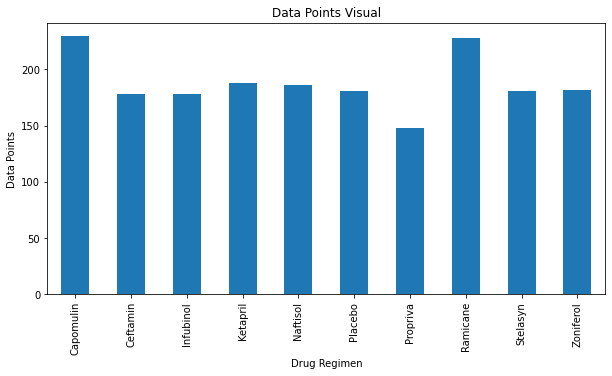

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_data_group = mouse_study_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

drug_data_group.plot(kind="bar", figsize=(10,5))

#set chart title
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

#show chart and set layout
plt.show()
plt.tight_layout()


Text(0, 0.5, 'Data Points')

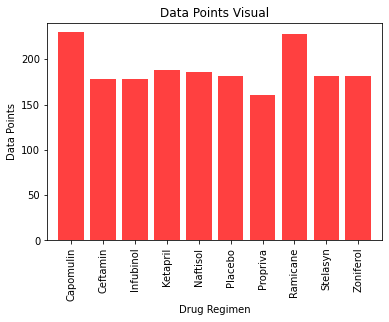

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

#Set the x_axis
x_axis = np.arange(len(drug_data_group))

plt.bar(x_axis, users, color="r", alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gendergroups = mouse_study_df.groupby(["Mouse ID","Sex"])
gendergroups

mouse_gender_df = pd.DataFrame(gendergroups.size())

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

#gender_df
mouse_gender


,Total Count,Percentage of Sex
Sex,,
Female,123,49.596774
Male,125,50.403226


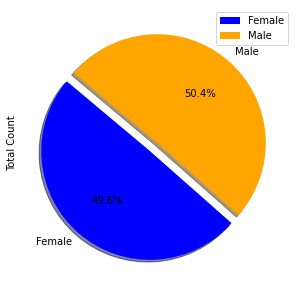

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ['blue', 'orange']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
top_regimens = mouse_study_df[mouse_study_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_regimens_df = top_regimens[top_regimens["Timepoint"].isin(["45"])]
top_regimens_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
  
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = top_regimens_df.loc[top_regimens_df["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    data = final_tumor_vol
    Q1 = np.percentile(data,25) 
    Q3 = np.percentile(data,75) 
    iqr = Q3 - Q1 
    print(f"The interquartile range of {treatment} is: {iqr}") 
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - (1.5*iqr)
    upper_bound = Q3 + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

  

The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The interquartile range of Ramicane is: 7.527130082499998
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.
The interquartile range of Infubinol is: 4.9311172099999965
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.
The interquartile range of Ceftamin is: 6.093590140000003
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


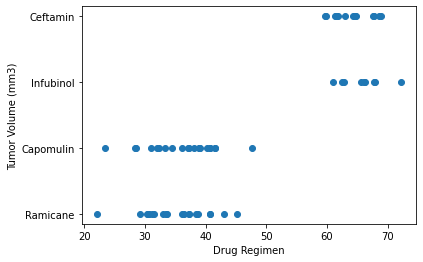

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


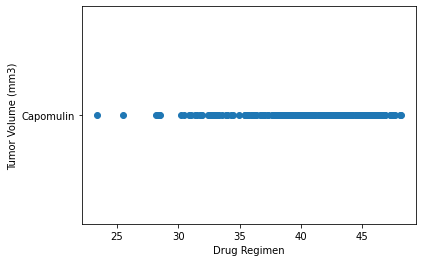

In [30]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
just_cap = top_regimens[top_regimens["Drug Regimen"].isin(["Capomulin"])]
graph_tumor_vol = top_regimens_df["Tumor Volume (mm3)"]
plt.scatter(just_cap['Tumor Volume (mm3)'],just_cap['Drug Regimen'])
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
